(Appendices/)=

# SMARTS Primer


## 1. What SMARTS is

**SMARTS** = *SMiles ARbitrary Target Specification*.
It extends the SMILES syntax so you can **search for patterns** (substructures) inside molecules instead of describing a single, fully defined molecule.

A SMILES string → describes *one* molecule.
A SMARTS pattern → describes *all* molecules that match that pattern

# 2. The “anatomy” of a SMARTS string

A SMARTS pattern is made of:

| Component             | Meaning                                | Example                        |
| --------------------- | -------------------------------------- | ------------------------------ |
| **Atom expressions**  | Describe what kind of atom can match.  | `[C]`, `[O]`, `[N+]`, `[!C]`   |
| **Bond expressions**  | Describe how atoms are connected.      | `-`, `=`, `#`, `:`, `~`        |
| **Logical operators** | Combine conditions.                    | `&` (AND), `,` (OR), `!` (NOT) |
| **Parentheses `()`**  | Group subpatterns.                     | `[$(C(=O)O)]`                  |
| **Recursion `$()`**   | A pattern within a pattern (powerful). | `[$([CX4][OX2H])]`             |


## a. Atom Expressions
Atom Expressions

Inside square brackets `[...]`, you can specify *which* atoms match and *how they’re bonded*.

| Token         | Meaning                                     | Example            | Matches            | Excludes            |
| :------------ | :------------------------------------------ | :----------------- | :----------------- | :------------------ |
| `C`, `N`, `O` | Element symbol (default valence inferred)   | `[C]`              | any carbon         | —                   |
| `A`           | any **aliphatic** atom (non-aromatic)       | `[A]`              | sp³ C, N, O…       | aromatic atoms      |
| `a`           | any **aromatic** atom                       | `[a]`              | benzene ring atoms | aliphatic atoms     |
| `*`           | any atom                                    | `[*]`              | everything         | —                   |
| `#n`          | atomic number =n                            | `[#6]`             | carbon             | —                   |
| `Xn`          | **connectivity** (number of attached atoms) | `[CX4]`            | sp³ carbon         | carbonyl C (X3)     |
| `Hn`          | explicit **hydrogen count**                 | `[OH1]`            | hydroxyl oxygen    | ether oxygen (H0)   |
| `v n`         | **valence electrons** (rarely used)         | `[Nv3]`            | neutral amine N    | quaternary N⁺       |
| `R`           | atom is in a ring (boolean)                 | `[CR]`             | cyclohexane C      | chain C             |
| `r n`         | in a ring of size n                         | `[Cr6]`            | benzene C          | cyclopropane C (r3) |
| `+n`, `-n`    | charge                                      | `[N+]`             | ammonium           | neutral N           |
| `!`           | logical NOT                                 | `[!O]`             | everything but O   | O                   |
| `;`           | logical AND (within atom expr.)             | `[C;H3]`           | methyl C           | secondary C         |
| `,`           | logical OR                                  | `[O,N]`            | O or N             | others              |
| `$()`         | **recursive** subpattern                    | `[$([CX4][OX2H])]` | alcohol            | carbonyl            |


## b. Bond Expressions

Outside atom brackets, characters define **bond types**:

| Symbol | Meaning             | Example       | Matches            |
| :----- | :------------------ | :------------ | :----------------- |
| `-`    | single              | `CC` or `C-C` | sigma bonds        |
| `=`    | double              | `C=O`         | carbonyl           |
| `#`    | triple              | `C#N`         | nitrile            |
| `:`    | aromatic bond       | `c1ccccc1`    | benzene            |
| `~`    | any bond (wildcard) | `C~O`         | single/double/etc. |
| `@`    | ring bond (stereo)  | `[C@H]`       | stereochem.        |
| `!`    | NOT a bond type     | `!@`          | non-ring bond      |

## c. Logic and Grouping

| Syntax     | Meaning                        | Example                        | Comment |
| :--------- | :----------------------------- | :----------------------------- | :------ |
| `[C,N]`    | carbon OR nitrogen             | `[O,N,S]` = heteroatoms        |         |
| `[C;H3]`   | carbon AND 3 hydrogens         | methyl carbon                  |         |
| `[!O;!N]`  | not O AND not N                | hydrocarbon atoms              |         |
| `$( ... )` | recursive/embedded subpattern  | `[$(C(=O)O)]` = carboxyl group |         |
| `()`       | parentheses for order grouping | `[C;$(=O)]`                    |         |

**Meaning of “X” and related symbols**

| Symbol    | Meaning                                             | Example                        |
| --------- | --------------------------------------------------- | ------------------------------ |
| **X**     | *connectivity number* (count of σ-bonded neighbors) | `[CX4]` = sp³ carbon           |
| **v**     | *valence* (number of bonded electrons)              | `[Nv3]` = trivalent nitrogen   |
| **H**     | number of attached hydrogens                        | `[OH1]` = hydroxyl O           |
| **R**     | ring membership (1 = in a ring)                     | `[CR1]` = ring carbon          |
| **r**     | ring size                                           | `[Cr6]` = in a 6-membered ring |
| **+ / −** | charge                                              | `[N+]`, `[O-]`                 |
| **!**     | NOT operator                                        | `[!O]` = any atom except O     |
| **& , ;** | AND/OR connectors                                   | `[C;H3]`, `[C,N]`              |


# 3. SMARTS Patterns
## Common Patterns
| SMARTS Pattern       | Meaning                                | Example Match                    |
|----------------------|-----------------------------------------|----------------------------------|
| `*`                  | Any atom                               | Matches all atoms                |
| `#6`                 | Carbon (atomic number 6)               | Matches any carbon atom          |
| `C`                  | Aliphatic carbon                       | Matches non-aromatic C           |
| `c`                  | Aromatic carbon                        | Matches benzene ring carbon      |
| `N`                  | Aliphatic nitrogen                     | Matches amines, etc.             |
| `n`                  | Aromatic nitrogen                     | Matches pyridine-type N          |
| `[O;H1]`             | Hydroxyl oxygen                        | Matches -OH group                |
| `[CX3]=O`            | Carbon (sp2) double bonded to O        | Carbonyl group                   |
| `[OX1H]`             | Single-bonded OH group                 | Alcohol or acid OH               |
| `[$([NH2]),$([NH])`  | Primary or secondary amine             | Amine groups                     |
| `[!#6]`              | Any atom except carbon                 | e.g., O, N, S, etc.              |
| `[C;H3]`             | Methyl carbon                          | Terminal CH₃ group               |
| `[R]`                | Any atom in a ring                     | Benzene, cyclohexane atoms       |
| `[R0]`               | Atom not in a ring                     | Linear chain atoms               |
| `[cH]`               | Aromatic hydrogen                      | e.g., hydrogen on benzene ring   |
| `C(=O)O`             | Carboxylic acid group (non-generic)    | Acetic acid                      |
| `[C@H](N)(C)`        | Chiral carbon (with wedge notation)    | Specific stereochemistry         |




## Functional Group Patterns

| Functional Group              | SMARTS Pattern         | Explanation                |
| :---------------------------- | :--------------------- | :------------------------- |
| **Alcohol**                   | `[CX4][OX2H]`          | sp³ C bonded to hydroxyl   |
| **Ether**                     | `[OD2]([CX4])[CX4]`    | O with two sp³ C neighbors |
| **Phenol**                    | `[c][OX2H]`            | aromatic C–OH              |
| **Aldehyde**                  | `[CX3H1](=O)[#6]`      | terminal carbonyl H        |
| **Ketone**                    | `[CX3](=O)[#6]`        | internal carbonyl          |
| **Carboxylic acid**           | `[CX3](=O)[OX2H1]`     | –C(=O)OH                   |
| **Ester**                     | `[CX3](=O)[OX2][CX4]`  | –C(=O)O–                   |
| **Amide**                     | `[NX3][CX3](=O)`       | N attached to carbonyl     |
| **Amine (primary/secondary)** | `[NX3;H2,H1;!$(NC=O)]` | excludes amides            |
| **Aromatic ring**             | `c1ccccc1`             | benzene 6-ring             |
| **Halogen**                   | `[F,Cl,Br,I]`          | halogen atoms              |
| **Thiol**                     | `[SX2H]`               | –SH                        |
| **Disulfide**                 | `[SX2]S`               | –S–S–                      |
| **Carboxylate anion**         | `[CX3](=O)[O-]`        | deprotonated acid          |

# 4. Using SMARTS in RDKit

SMARTS is a notation and language specification—a symbolic way to describe structural patterns in molecules. However, what actually happens when you run a SMARTS query depends on how the SMARTS parser and matcher are implemented in the cheminformatics toolkit you are using. Different toolkits such as RDKit, Open Babel, or Daylight, may interpret certain SMARTS features differently based on how they handle aromaticity, implicit hydrogens, or valence rules.

In this section, we focus on how RDKit interprets and applies SMARTS patterns. Understanding these nuances is essential because the same SMARTS expression can yield different results across toolkits. By exploring RDKit’s parsing behavior, matching functions, and query options, you’ll gain insight into how SMARTS are operationalized within a specific chemical perception engine—and why awareness of these implementation details matters in cheminformatics workflows.

When RDKit reads a SMARTS string, it doesn’t treat it as plain text — it compiles it into a special internal object called a query molecule. This object defines a set of atom and bond constraints that RDKit can test against other molecules. The process works conceptually as follows:

  1. Parsing – The SMARTS string (e.g., [O;D2]) is read by `Chem.MolFromSmarts()`, which checks for valid syntax and builds an RDKit molecule object. This is the same type of object you get when you read a SMILES string, but it has special properties for querying. It has the same Python type as a normal molecule (`rdkit.Chem.rdchem.Mol`), but internally its atoms are QueryAtoms and its bonds are QueryBonds—specialized objects that store logical rules instead of fixed chemical properties.
  2. Compilation – RDKit translates these symbolic queries into a query graph, a data structure optimized for substructure searching. 
  3. Matching – When you call `mol.HasSubstructMatch(patt)` or `mol.GetSubstructMatches(patt)`, RDKit walks this query graph, comparing each atom and bond in the target molecule against the constraints in the query molecule.
  4. Result Handling – Matches are returned as tuples of atom indices (for example, which atoms in ethanol match the [OX2H] pattern).

Because RDKit relies on its own definitions of aromaticity, valence, and hydrogen handling, the results of a SMARTS query reflect RDKit’s chemical perception model rather than an absolute SMARTS truth.

## 4.1 RDKit Functions and Methods for SMARTS

Working with SMARTS in RDKit involves a mix of functions (usually from `rdkit.Chem`) and methods (attached to molecule objects). The table below summarizes the most common ones used interactively with SMARTS patterns in Jupyter Lab.

> **Note:** RDKit functions that start with `Chem.` generally *create or convert* molecule objects, while methods called on a molecule (e.g., `mol.HasSubstructMatch(patt)`) act upon those objects.

---

### Table: Common RDKit Functions and Methods for SMARTS Workflows

| Category                             | Function / Method                      | Description                                                                                            | Typical Use Case                                               |
| :----------------------------------- | :------------------------------------- | :----------------------------------------------------------------------------------------------------- | :------------------------------------------------------------- |
| **Create / Parse**                   | `Chem.MolFromSmarts(s)`                | Parses a SMARTS string into a **query molecule** (`Mol` with `QueryAtoms`). Returns `None` if invalid. | Create a SMARTS pattern: `patt = Chem.MolFromSmarts("[O;D2]")` |
|                                      | `Chem.MolToSmarts(mol)`                | Converts a molecule back into its SMARTS string representation.                                        | Inspect or export a query molecule.                            |
|                                      | `Chem.MolFromSmiles(smi)`              | Parses a SMILES into a *regular* molecule (for targets).                                               | Define target molecules for substructure searching.            |
| **Search / Match**                   | `mol.HasSubstructMatch(patt)`          | Returns `True` if the molecule matches the SMARTS pattern.                                             | Quick Boolean tests.                                           |
|                                      | `mol.GetSubstructMatches(patt)`        | Returns tuples of atom indices that match the SMARTS pattern.                                          | Locate and highlight matched atoms.                            |
|                                      | `mol.GetSubstructMatch(patt)`          | Returns the *first* match only (single tuple).                                                         | Simpler alternative for small molecules.                       |
| **Query Introspection**              | `atom.DescribeQuery()`                 | Returns a text description of the logical tests for a query atom.                                      | Explore how RDKit interprets your SMARTS internally.           |
|                                      | `bond.DescribeQuery()`                 | Describes bond-level query logic.                                                                      | Examine SMARTS bond conditions.                                |
|                                      | `Chem.MolToMolBlock(patt)`             | Prints the query molecule in MOL-block format, including SMARTS info.                                  | Debugging or visualization.                                    |
| **Visualization (Jupyter-friendly)** | `from rdkit.Chem import Draw`          | RDKit drawing submodule.                                                                               | Must import to render structures in notebooks.                 |
|                                      | `Draw.MolToImage(mol, size=(200,200))` | Creates a PIL image of a molecule or SMARTS match.                                                     | Display molecules inline in Jupyter Lab.                       |
|                                      | `Draw.MolsToGridImage([...])`          | Displays multiple molecules side-by-side (optionally with highlights or legends).                      | Compare pattern matches visually.                              |
| **Batch Searching**                  | `Chem.SubstructLibrary()`              | Builds an indexed library for fast bulk substructure queries.                                          | Screening many molecules against one SMARTS.                   |
| **Reactions / Advanced**             | `Chem.ReactionFromSmarts(s)`           | Parses reaction SMARTS into an RDKit reaction object.                                                  | For SMARTS-based transformations.                              |
|                                      | `rxn.RunReactants((mol1, ...))`        | Applies reaction SMARTS to one or more molecules.                                                      | Explore reaction mapping or retrosynthesis.                    |

---

### Jupyter-Specific Notes

* In **Jupyter Lab**, RDKit’s `Draw` module automatically integrates with IPython’s display system. Simply placing a molecule as the last line in a code cell will render it as an image:

  ```python
  from rdkit import Chem
  from rdkit.Chem import Draw

  mol = Chem.MolFromSmiles("CCO")
  mol  # ← rendered automatically in Jupyter
  ```
* Outside Jupyter (e.g., VS Code terminal or a script), you must explicitly call `Draw.MolToImage()` or `Draw.ShowMol()` to view molecules.
* To highlight SMARTS matches in teaching examples, you can use:

  ```python
  patt = Chem.MolFromSmarts("[OX2H]")
  matches = mol.GetSubstructMatches(patt)
  Draw.MolToImage(mol, highlightAtoms=[a for m in matches for a in m])
  ```


Match found!
Matched atom indices: ((2,), (4,))
mol type: <class 'rdkit.Chem.rdchem.Mol'>
patt type: <class 'rdkit.Chem.rdchem.Mol'>
smarts_string type: <class 'str'>


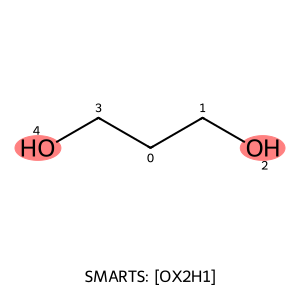

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import Image

# Step 1: Create the target molecule from SMILES
mol = Chem.MolFromSmiles("C(CO)CO")  # ethanol

# Step 2: Create the SMARTS query and store its string form
patt = Chem.MolFromSmarts("[OX2H]")  # alcohol oxygen pattern
smarts_string = Chem.MolToSmarts(patt).replace("&","")  # convert to string for display

# Step 3: Test for substructure match
if mol.HasSubstructMatch(patt):
    print("Match found!")

# Step 4: Get substructure matches and print them
matches = mol.GetSubstructMatches(patt)
print("Matched atom indices:", matches)

# Step 5: Inspect object types
print("mol type:", type(mol))
print("patt type:", type(patt))
print("smarts_string type:", type(smarts_string))

# Step 6: Highlight matching atoms
highlight_atoms = [a for m in matches for a in m]

# Step 7: Draw molecule with atom indices, highlights, and SMARTS legend
drawer = Draw.MolDraw2DCairo(300, 300)
opts = drawer.drawOptions()
opts.addAtomIndices = True  # show atom index numbers

# ✅ Add the legend argument *inside* DrawMolecule()
legend_text = f"SMARTS: {smarts_string}"
drawer.DrawMolecule(mol, highlightAtoms=highlight_atoms, legend=legend_text)
drawer.FinishDrawing()

# Step 8: Display image in Jupyter
Image(drawer.GetDrawingText())


In [2]:
from rdkit import Chem

molecules = {
    "ethanol": "CCO",
    "acetone": "CC(=O)C",
    "acetic_acid": "CC(=O)O",
    "ethyl_acetate": "CCOC(=O)C",
    "aniline": "c1ccccc1N"
}

patterns = {
    "alcohol": "[CX4][OX2H]",
    "ketone": "[CX3](=O)[#6]",
    "ester": "[CX3](=O)[OX2][CX4]",
    "amine": "[NX3;H2,H1;!$(NC=O)]"
}

for name, smi in molecules.items():
    mol = Chem.MolFromSmiles(smi)
    print(f"\n{name}: {smi}")
    for pname, smarts in patterns.items():
        patt = Chem.MolFromSmarts(smarts)
        print(f"  {pname:8s} -> {mol.HasSubstructMatch(patt)}")


ethanol: CCO
  alcohol  -> True
  ketone   -> False
  ester    -> False
  amine    -> False

acetone: CC(=O)C
  alcohol  -> False
  ketone   -> True
  ester    -> False
  amine    -> False

acetic_acid: CC(=O)O
  alcohol  -> False
  ketone   -> True
  ester    -> False
  amine    -> False

ethyl_acetate: CCOC(=O)C
  alcohol  -> False
  ketone   -> True
  ester    -> True
  amine    -> False

aniline: c1ccccc1N
  alcohol  -> False
  ketone   -> False
  ester    -> False
  amine    -> True


# 5. SMARTS Explorer Activity
Run the following code and then use the SMARTS explorer to answer the following questions.

In [3]:
molecules = {
    "Ethanol": "CCO",
    "Explicit Ethanol": "CC[OH]",
    "Acetone": "CC(=O)C",
    "Acetic acid": "CC(=O)O",
    "Ethyl acetate": "CCOC(=O)C",
    "Phenol": "c1ccc(cc1)O",
    "Aniline": "c1ccccc1N",
    "Dimethyl ether": "COC",
    "Toluene": "Cc1ccccc1",
    "Nitrobenzene": "c1ccc(cc1)[N+](=O)[O-]",
    "2-nitropropane": "CC(C)[N+](=O)[O-]",
    "Methanol": "CO",
    "Acetamide": "CC(=O)N",   
}

In [4]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display, Markdown
import ipywidgets as widgets



def smarts_lab(smarts_pattern):
    patt = Chem.MolFromSmarts(smarts_pattern)
    if patt is None:
        display(Markdown(f"❌ Invalid SMARTS pattern: `{smarts_pattern}`"))
        return
    images = []
    legends = []
    for name, smi in molecules.items():
        mol = Chem.MolFromSmiles(smi)
        matches = mol.GetSubstructMatches(patt)
        highlight = [a for m in matches for a in m]
        img = Draw.MolToImage(mol, size=(200,200), highlightAtoms=highlight)
        images.append(img)
        legends.append(name)
    display(Markdown(f"### Pattern: `{smarts_pattern}`"))
    display(Draw.MolsToGridImage(
        [Chem.MolFromSmiles(s) for s in molecules.values()],
        legends=legends,
        highlightAtomLists=[
            [a for m in Chem.MolFromSmiles(s).GetSubstructMatches(patt) for a in m]
            for s in molecules.values()
        ],
        subImgSize=(200,200),
        molsPerRow=4
    ))

widgets.interact(
    smarts_lab,
    smarts_pattern=widgets.Text(
        value='[CX4][OX2H]',
        description='SMARTS:',
        placeholder='Type a SMARTS pattern…',
        continuous_update=False
    )
)

interactive(children=(Text(value='[CX4][OX2H]', continuous_update=False, description='SMARTS:', placeholder='T…

<function __main__.smarts_lab(smarts_pattern)>

## Comparing groups

Paste the following groups into the SMARTS Explorer and see what they match. 

| Topic               | Try this SMARTS         | Expected Outcome                               |
| :------------------ | :-----------------------| :--------------------------------------------- |
| Alcohol vs Carbonyl | `[CX4][OX2H]`           | Highlights ethanol & phenol but not acetone    |
| Carbonyl group      | `[CX3]=O`               | Highlights acetone, acetic acid, ethyl acetate |
| Ketone group        | `[#6][CX3](=O)[#6]`     | Highlights acetone only                        |
| Carboxylic acid     | `[CX3](=O)[OX2H1]`      | Only acetic acid                               |
| Ester linkage       | `[CX3](=O)[OX2][CX4]`   | Only ethyl acetate                             |
| Amine only          | `[NX3;!$(NC=O);!$(N=O)]`| Aniline only                                   |
| Amide only          | `[NX3][CX3](=O)`        | Only acetamide                                 |
| Hydrocarbon chain C | `[CX4;!R]`              | Aliphatic chains only                          |
| Aromatic ring       | `c1ccccc1`              | All benzene derivatives                        |



## Comparing ether patterns
Paste the following ehter patterns into the SMARTS Explorer to see how there are different ways of generating SMARTS patterns. 
|  SMARTS Pattern        | type                   |comments                    |
| :--------------------- | :----------------------------- | :--------------------------- |
| [O;D2]            | minimalist   | Ether oxygen with 2 carbons |
| [#6X4]-[OX2]-[#6X4]           | Bond based    | each carbon has 4 bonds |
| `[OD2]([CX4])[CX4]` | Branch based | Oxygen has a C branch   |

## Activity
Provide SMARTS patterns that do the following.  You can test them in the SMARTS Explorer above. 


1. Show nitro group of nitrobenzene and 2-nitropropane
2. Show the nitro group of nitrobenzene but not 2-nitropropane
3. Show the nitro group of 2-nitropropane but not nitrobenzene
4. Show just the nitrogen of the nitro group in nitrobenzene and 2-nitropropane (use recursive SMARTS)
5. Show the alcohol group of all alcohols
6. Show the alcohol group of ethanol but not phenol
7. Show the alcohol group of phenol but not ethanol
8. Show the ether group of dimethyl ether but not ethyl acetate
9. Show all C=O bonds 
10. Show amines and amides but not nitro or nitroso compounds


# 6.  Assignment

You should use an AI to assist you in this assignment. The following code cell takes a dictionary of amino acids and their SMILES strings and uses the RDKit library to create a polypeptide from 5 randomly selected amino acids.  Your job is to create a new Jupyter notebook called **Amino Acid Functional Group Explorer** that identifies which functional groups are present in your amino acid, and displays an image for each functional group with the name of the group as the label and the group(s) highlighted on the polypeptide. 

Two assist you I have also created a dictionary of common functional groups and their SMARTS patterns. You can use this to identify the functional groups in your polypeptide. 


In [5]:
#This program will build and display a polypeptide from 5 randomly selected amino acids from a python dictionary

import random
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

# Step 1: Define amino acids (simplified SMILES, unprotected)
amino_acids = {
    "Gly": "NCC(=O)O",
    "Ala": "NCC(C)C(=O)O",
    "Val": "NCC(C(C)C)C(=O)O",
    "Leu": "NCC(CC(C)C)C(=O)O",
    "Ile": "NCC(C(C)C)C(=O)O",
    "Ser": "NCC(CO)C(=O)O",
    "Thr": "NCC(C(O)C)C(=O)O",
    "Asp": "NCC(C(=O)O)C(=O)O",
    "Glu": "NCC(CC(=O)O)C(=O)O",
    "Lys": "NCC(CCCCN)C(=O)O",
    "Arg": "NCC(CCCNC(N)=N)C(=O)O",
    "Phe": "NCC(Cc1ccccc1)C(=O)O",
    "Tyr": "NCC(Cc1ccc(O)cc1)C(=O)O",
    "Trp": "NCC(Cc1c[nH]c2ccccc12)C(=O)O",
    "His": "NCC(Cc1cncn1)C(=O)O",
    "Asn": "NCC(C(=O)N)C(=O)O",
    "Gln": "NCC(CC(=O)N)C(=O)O",
    "Met": "NCC(CSC)C(=O)O",
    "Cys": "NCC(CS)C(=O)O",
    "Pro": "N1CCC[C@H](C(=O)O)N1"
}

# Step 2: Randomly select 5 amino acids
selected = random.sample(list(amino_acids.items()), 5)
print("Selected amino acids:", [aa for aa, smi in selected])

# Step 3: Convert to RDKit molecules
mols = [Chem.MolFromSmiles(smi) for aa, smi in selected]

# Step 4: Use RDKit’s peptide builder (requires RDKit >=2022)
# if not available, can use a manual connection function
from rdkit.Chem import rdChemReactions

# Define generic peptide coupling reaction: acid + amine → amide + H2O
rxn = rdChemReactions.ReactionFromSmarts("[C:1](=O)[O:2].[N:3]>>[C:1](=O)[N:3]")

# Step 5: Iteratively build the chain
peptide = mols[0]
for next_mol in mols[1:]:
    prod = rxn.RunReactants((peptide, next_mol))
    peptide = prod[0][0]  # take first product
    Chem.SanitizeMol(peptide)

# Step 6: Display the final random pentapeptide
Draw.MolToImage(peptide, size=(400, 300))



Selected amino acids: ['Asp', 'His', 'Ile', 'Gly', 'Cys']


[17:34:20] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8
[17:34:20] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 2 


ValueError: reaction called with None reactants

In [ ]:
functional_groups = {
    # Core functional groups
    "Amine (primary/secondary/tertiary)": "[NX3;!$(NC=O);!$([N]~[!#1;!#6])]",
    "Carboxylic acid": "[CX3](=O)[OX2H1]",
    "Amide": "[CX3](=O)[NX3]",
    "Alcohol": "[OX2H][CX4]",
    "Phenol": "c[OX2H]",
    "Thiol": "[SX2H]",
    "Thioether": "[SX2][CX4]",
    "Ether": "[OD2]([#6])[#6]",
    "Ketone": "[#6][CX3](=O)[#6]",
    "Aldehyde": "[CX3H1](=O)[#6]",
    "Carboxylate (deprotonated acid)": "[CX3](=O)[O-]",
    
    # Nitrogen-rich groups
    "Guanidinium": "NC(=[NH2+])N",
    "Amidinium": "NC(=N)N",
    "Imidazole": "c1ncnc1",
    "Indole": "c1ccc2c(c1)[nH]cc2",
    "Amine (aromatic)": "c[NX3;!$(NC=O)]",
    
    # Sulfur groups
    "Disulfide": "[SX2][SX2]",
    "Thioester": "[CX3](=O)[SX2]",
    
    # Acid derivatives
    "Ester": "[CX3](=O)[OX2][CX4]",
    "Carbamate": "[NX3][CX3](=O)[OX2]",
    
    # Aromatic ring
    "Aromatic ring": "a1aaaaa1"
}